# Ejercicio 4 - Dimensionalidad
Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

## Definición de funciones
Comencemos por definir las funciones que nos serviran para el caso de diagonales y el caso de paralelas.

In [49]:
from Generadores import diagonales, paralelas
from Comunes import standardTree
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss

In [46]:
# Definimos una funcion que dados los parametros y la lista de valores de d (dimensionalidad) genere la lista de training sets
def generateTrainingSetsD(setCount, generator, C, n, dims):

    # Inicializamos la lista de conjuntos de entrenamiento
    trainingSets = [[] for _ in range(len(dims))]
    
    # Para cada valor de d
    for i, d in enumerate(dims):

        # Generamos setCount conjuntos de entrenamiento
        for _ in range(setCount):
            trainingSets[i].append(generator(n, d, C))
            time.sleep(1)    

    return trainingSets

In [7]:
# La funcion para generar clasificadores es identica a la del ejercicio anterior, donde cValsCount es dimsCount
def generateClassifiers(dimsCount, setCount, trainingSets):
    # Creamos la lista de listas de clasificadores. La lista contiene dimsCount listas con setCount clasificadores cada una.
    classifiers = [[] for _ in range(dimsCount)]
    
    # Creamos los clasificadores
    for classifierList in classifiers:
        for i in range(setCount):
            classifierList.append(standardTree())
    
    # Entrenamos los clasificadores con su set de entrenamiento correspondiente.
    for i,classifierList in enumerate(classifiers):
        for j,classifier in enumerate(classifierList):
            classifier.fit(list(trainingSets[i][j]["Input"]), list(trainingSets[i][j]["Output"]))

    return classifiers

In [36]:
# Devuelve (trainingErrors, testErrors) como tupla.
def getPerformanceStats(trainingSets, dimsCount, setCount, testsSet, classifiers):
    # Creamos una lista de listas de errores. La lista contiene dimsCount listas con setCount elementos cada una, de manera que 
    # trainingErrors[i][j] es el error de entrenamiento para el classifier[i][j]. Lo mismo vale para testErrors.
    # Esto sera la salida de nuestra funcion.
    trainingErrors = [[] for _ in range(dimsCount)] 
    testErrors     = [[] for _ in range(dimsCount)] 
    
    # Para cada lista de conjuntos de entrenamiento
    for i in range(dimsCount):
    
        # Y para cada conjunto de entrenamientos dentro de la lista
        for j in range(setCount):
    
            # Extraemos su clasificador asociado
            classifier = classifiers[i][j]
    
            # Predecimos los outputs sobre el mismo conjunto de entrenamiento y calculamos su loss
            trainingPredict = classifier.predict(list(trainingSets[i][j]["Input"]))
            trainingLoss = zero_one_loss(trainingSets[i][j]["Output"], trainingPredict)
    
            trainingErrors[i].append(trainingLoss)
    
            # Predecimos los outputs sobre el conjunto de test y calculamos su loss
            testPredict = classifier.predict(list(testsSet[i]["Input"]))
            testLoss = zero_one_loss(testsSet[i]["Output"], testPredict)
            
            testErrors[i].append(testLoss)
    
    return (trainingErrors, testErrors)

In [32]:
def plotErrors(trainingErrorsDiagonales, testErrorsDiagonales, trainingErrorParalelas, testErrorsParalelas, dims):

    meanTrainingErrorsDiagonales = [np.mean(errorList) for errorList in trainingErrorsDiagonales]
    meanTestErrorsDiagonales     = [np.mean(errorList) for errorList in testErrorsDiagonales]
        
    meanTrainingErrorsParalelas = [np.mean(errorList) for errorList in trainingErrorsParalelas]
    meanTestErrorsParalelas     = [np.mean(errorList) for errorList in testErrorsParalelas]
        
    plt.figure(figsize=(10, 6))
        
    # Graficamos error de entrenamiento contra error de testeo para diagonales
    plt.plot(dims, meanTrainingErrorsDiagonales, color="blue", marker='o', linestyle='-', linewidth=2, markersize=8, label='Error de entrenamiento diagonales')
    plt.plot(dims, meanTestErrorsDiagonales, color="orange", marker='s', linestyle='-', linewidth=2, markersize=8, label='Error de testeo diagonales')
    
    # Y para paralelas
    plt.plot(dims, meanTrainingErrorsParalelas, color="purple", marker='o', linestyle='-', linewidth=2, markersize=8, label='Error de entrenamiento paralelas')
    plt.plot(dims, meanTestErrorsParalelas, color="yellow", marker='s', linestyle='-', linewidth=2, markersize=8, label='Error de testeo paralelas')
    
    plt.xlabel("Dimensionalidad", fontsize=12)
    plt.ylabel("Tasa de error", fontsize=12)
    plt.title("Error de entrenamiento vs Error de testeo", fontsize=14)
    plt.grid(True, which="both", linestyle='--', alpha=0.5)
    plt.legend(fontsize=10)
    
    # Marcamos los tamaños adecuados en el eje X
    ax = plt.gca()
    ax.set_xticks(dims)  
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter()) # Esto cambia los numeros a notacion normal y no cientifica
    ax.tick_params(axis='x', which='minor', bottom=False)     # Esconde los ticks del eje que no son relevantes
    
    # Y setteamos los valores del eje Y para que matcheen con nuestros resultados
    ax.set_yticks(np.round(sorted(set(meanTrainingErrorsParalelas + meanTestErrorsParalelas + meanTrainingErrorsDiagonales + meanTestErrorsDiagonales)), decimals=2))
    
    plt.show()

## Definición de parámetros y clasificadores
Pasemos ahora a utilizar las funciones previamente definidas para generar los datos necesarios para entrenar a los distintos clasificadores.

In [47]:
# Definimos los parametros
dims = [2, 4, 8, 16, 32]
ntrain = 250
ntest = 10000
cval = 0.78

setCount = 20
dimsCount = len(dims)

In [51]:
# Casos de test para diagonales.
testSetsDiagonales = []

for d in dims:
    testSetsDiagonales.append(diagonales(ntest,d,cval))
    time.sleep(1)

trainingSetsDiagonales = generateTrainingSetsD(setCount, diagonales, cval, ntrain, dims)

In [52]:
diagonalClassifiers = generateClassifiers(dimsCount, setCount, trainingSetsDiagonales)
trainingErrorsDiagonales, testErrorsDiagonales = getPerformanceStats(trainingSetsDiagonales, dimsCount, setCount, testSetsDiagonales, diagonalClassifiers)

In [53]:
# Casos de test para paralelas.
testSetsParalelas = []

for d in dims:
    testSetsParalelas.append(paralelas(ntest,d,cval))
    time.sleep(1)

trainingSetsParalelas = generateTrainingSetsD(setCount, paralelas, cval, ntrain, dims)

In [54]:
parallelClassifiers = generateClassifiers(dimsCount, setCount, trainingSetsParalelas)
trainingErrorsParalelas, testErrorsParalelas = getPerformanceStats(trainingSetsParalelas, dimsCount, setCount, testSetsParalelas, parallelClassifiers)

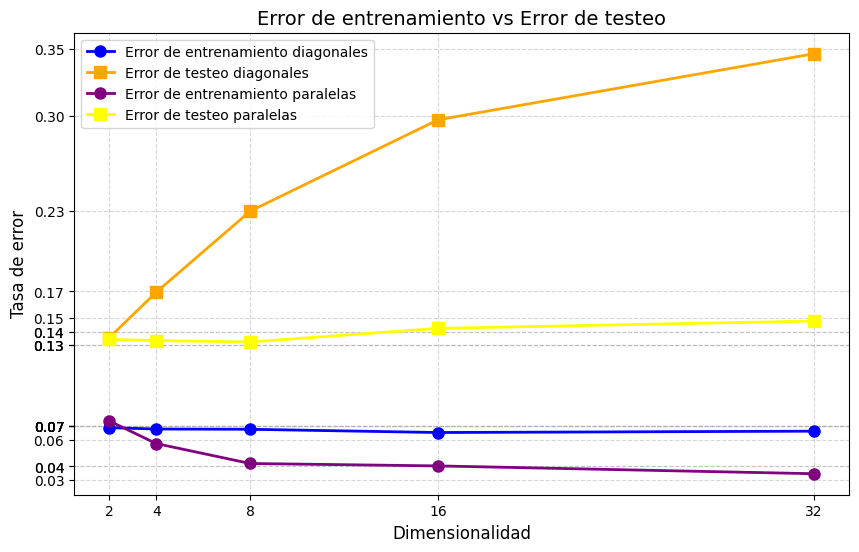

In [56]:
plotErrors(trainingErrorsDiagonales, testErrorsDiagonales, trainingErrorsParalelas, testErrorsParalelas, dims)

## Comentarios sobre los resultados
Primero analicemos lo que podemos ver de las gráficas. Para el caso de los errores de entrenamiento, podemos ver que ambos errores se mantienen en un rango de valores bastante similiares. También, podemos observar que el error de entrenamiento para el problema de las diagonales es más consistente, mientras que para el problema de de las paralelas el error muestra una tendencia decreciente.

Por otro lado, para los casos de errores de testeo, podemos notar que para el problema de las paralelas los valores se mantienen bastante consistentes con un sutil crecimiento a medida que aumentamos la dimensionalidad. Pero para el problema de las diagonales el crecimiento es mucho más notorio y partir de dimensiones mayores a 4 el error es significativamente mayor al error de testeo para paralelas.

Analicemos a qué se debe el crecimiento abrupto del error de testeo para el problema de las diagonales. Lo primero que tenemos que analizar es como se construye el árbol clasificador. Independientemente de la dimensión en la que estemos trabajando, el procedimiento que sigue nuestro clasificador es:
- Seleccionar una componente $x_i$.
- Escoger un valor $k$ para dividir a los datos en aquellos que verifican $x_i \le k$ y aquellos que no.

O sea, nuestro clasificador genera una especie de "corte" en alguna de las dimensiones de los datos.

Analicemos por ejemplo los resultados del ejercicio 2, donde trabajamos con estas distribuciones en dimensión 2. Para ambos casos la solución óptima es una recta: en el caso del problema de las paralelas es una vertical y en el caso de las diagonales una que está inclinada. 

El clasificador para el caso de las paralelas consigue aproximar muy bien a esta solución debido a la naturaleza de las preguntas del árbol. La solución óptima, que es una recta vertical, puede ser descrita perfectamente con preguntas sobre el atributo $x_0$.

En cambio, el problema de describir una recta con inclinación únicamente a través de desigualdades sobre $x$ e $y$ es irresoluble con una cantidad finita de preguntas. Es decir, la solución óptima no es siquiera alcanzable por como se construyen los arboles de decisión. Lo mejor que puede lograrse es una línea escalonada que aproxime a la recta buscada, y que clasificará mejor cuantos mas escalones tenga (es decir, cuanto mas parecida a la recta inclinada es). Esto puede observarse en las gráficas de la cantidad de nodos de los árboles del ejercicio 2 para ambos problemas: mientras que el problema de las paralelas encuentra un pico alrededor del tamaño 1000 y luego su cantidad de nodos decrece bruscamente (pues deja de sobreajustar al conjunto de entrenamiento), el problema de las diagonales también decrece pero se estabiliza a un valor mucho mas alto.

Retomemos ahora el análisis sobre el problema de clasificar puntos de dimensión $n$. Lo que buscamos ahora es describir un hiperplano que separe ambas clases a través de preguntas del tipo "es $x_i \le k$?". Aquí es donde el problema de las diagonales se complejiza significativamente. Si bien ya era imposible describir la recta inclinada en dos dimensiones, la cantidad de preguntas necesarias para aproximarnos al hiperplano óptimo crece exponencialmente conforme incrementa la dimensión de los datos. El problema es que la cantidad de preguntas que podemos realizar es finita, y un *split* solo puede realizarse si la ganancia de información es lo suficientemente alta, por lo que existe un límite a cuan cercano al hiperplano óptimo puede ser el descrito por el árbol que construiremos.

En cambio, el problema de las paralelas no se ve afectado por el aumento en la dimensionalidad. El hiperplano buscado sigue pudiendo ser representado perfectamente por una única pregunta sobre el valor de la primer componente de cada dato, el clasificador solo debe aprender valor de *k* óptimo para ello.

## Respuesta anterior

Ahora analicemos los resultados del ejercicio 2 (que trabaja con puntos de dimensión 2) para que podamos entender un poco el concepto general y luego podamos extenderlo a más dimensiones. Para ambos problemas en dos dimensiones, la manera más sencilla de dividir a los conjuntos es utilizando una recta: en el caso de el problema de las paralelas una vertical, y en el caso de las diagonales una que está inclinada. El clasificador de las paralelas consigue aproximar muy bien ésto debido a la naturaleza de las preguntas que hace: dicha recta está perfectamente descrita por tomar la componente $x$ y preguntar si $x \le 0$. Por otro lado, en el problema de las diagonales, es imposible generar una recta con inclinación con una única pregunta de este estilo: tenemos que realizar múltiples preguntas para poder aproximarnos a la recta deseada. Ésto último lo podemos observar en los ejemplos del ejercicio 2, cuando la división que consigue realizar sigue una forma escalonada (representando que realiza múltiples preguntas en ambas dimensiones para ir aproximando la diagonal).

También lo que produce la división escalonada, es que aumente el error ya una clase "invade" el espacio que le corresponde a la otra. Si tuviéramos una linea diagonal perfecta, aunque la clasificación no es totalmente correcta (debido a que la recta diagonal sigue clasificando puntos de una clase como si fuesen de la otra), tenemos una división que es bastante equitativa. Cuando aparecen los escalones, empezamos a dejar de lado esa "división equitativa" y empiezan a aparecer zonas (los escalones) en donde vamos más allá de la diagonal y clasificamos peor los puntos.

Entonces pensemos que pasa con todo esto que discutimos a medida que aumentamos la dimensionalidad del problema. El problema de las paralelas, para cualquier dimensión en la que nos encontremos, se sigue pudiendo resolver con una sola pregunta en una dimensión (análogo a la dimensión 2), ya que dicha pregunta determina perfectamente el hiperplano que divide de manera equitativa a las dos clases (como la recta en dimensión 2). El problema viene cuando queremos aproximar nuestro "hiperplano inclinado", la extensión de la recta inclinada en dimensión 2. Para poder aproximar ese hiperplano, tenemos que realizar muchísimas más preguntas y empiezan a aparecer "escalones de dimensiones más altas". Ésto produce que la división sea mucho más dificil de conseguir, y el error aumenta debido a que los escalones cada vez invaden más el espacio de la otra clase, avanzando sobre el hiperplano ideal que divide de manera equitativa a las clases.